<h1>TASK 2</h1>

Question 1

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sklearn
import os
from sklearn.tree import DecisionTreeClassifier

In [2]:
df = pd.DataFrame()
df_test = pd.DataFrame()
dict1 = {"LAYING":0,
"SITTING":1,
"STANDING":2,
"WALKING":3,
"WALKING_DOWNSTAIRS":4,
"WALKING_UPSTAIRS":5}

In [3]:
for files in os.listdir(fr"C:\Users\surri\PycharmProjects\es335-24-fall-assignment-1\HAR\Combined\Train"):
    for dfs in os.listdir(os.path.join("HAR\Combined\Train", files)):
        df1 = pd.read_csv(fr"HAR\Combined\Train\{files}\{dfs}")
        df1["Label"] = np.array([dict1[files]]*df1.shape[0])
        df = pd.concat([df,df1],axis = 0)

In [4]:
for files in os.listdir(fr"C:\Users\surri\PycharmProjects\es335-24-fall-assignment-1\HAR\Combined\Test"):
    for dfs in os.listdir(os.path.join("HAR\Combined\Test", files)):
        df1 = pd.read_csv(fr"HAR\Combined\Test\{files}\{dfs}")
        df1["Label"] = np.array([dict1[files]]*df1.shape[0])
        df_test = pd.concat([df_test,df1],axis = 0)

In [5]:
df_test.shape

(188608, 4)

In [6]:
df.shape

(470528, 4)

In [7]:
dt = DecisionTreeClassifier(criterion="gini", random_state=42,
        splitter="best",
        max_depth=None,
        min_samples_split=2,
        min_samples_leaf=1,
        min_weight_fraction_leaf=0.0,
        max_features=None,
        max_leaf_nodes=None,
        min_impurity_decrease=0.0,
        class_weight=None,
        ccp_alpha=0.0,
        monotonic_cst=None)

In [8]:
X = df.drop("Label", axis = 1)
Y = df["Label"]

In [9]:
dt.fit(X, Y)

DecisionTreeClassifier(random_state=42)

In [10]:
predictions = dt.predict(df_test.drop("Label", axis = 1))

In [11]:
predictions.shape

(188608,)

In [12]:
df_test["Label"].shape

(188608,)

In [10]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

In [14]:
accuracy = accuracy_score(predictions, df_test["Label"])
print(f"Accuracy: {accuracy}")

Accuracy: 0.5628022141160502


In [15]:
precision = precision_score(predictions, df_test["Label"],average="weighted")
print(f"Precision: {precision}")

Precision: 0.5512171505744833


In [16]:
recall = recall_score(predictions, df_test["Label"],average="weighted")
print(f"Recall: {recall}")

Recall: 0.5628022141160502


In [17]:
from sklearn.metrics import confusion_matrix

mat = confusion_matrix(predictions, df_test["Label"])
print(f"Confusion Matrix:\n{mat}")


Confusion Matrix:
[[34278     0     0     0     0     3]
 [    0 19633  5112   350   234   232]
 [    0  5223 16564   967   482   714]
 [    1  2214  4984 12945  9046 10315]
 [   88  2183  1907  8992 10982  7133]
 [    1  2171  5481  8490  6136 11747]]


In [3]:
Xtrain_tsfel = pd.read_csv(fr"C:\Users\surri\PycharmProjects\es335-24-fall-assignment-1\X_train_tsfel.csv")

In [4]:
Ytrain_tsfel = pd.read_csv(fr"C:\Users\surri\PycharmProjects\es335-24-fall-assignment-1\y_train_tsfel.csv",header = None)

In [5]:
Xtest_tsfel = pd.read_csv(fr"C:\Users\surri\PycharmProjects\es335-24-fall-assignment-1\X_test_tsfel.csv")

In [6]:
Ytest_tsfel = pd.read_csv(fr"C:\Users\surri\PycharmProjects\es335-24-fall-assignment-1\y_test_tsfel.csv",header= None)

In [25]:
Xtrain_tsfel.head()

,0_Absolute energy,0_Area under the curve,0_Autocorrelation,0_Average power,0_Centroid,0_ECDF Percentile Count_0,0_ECDF Percentile Count_1,0_ECDF Percentile_0,0_ECDF Percentile_1,0_ECDF_0,...,2_Wavelet variance_0,2_Wavelet variance_1,2_Wavelet variance_2,2_Wavelet variance_3,2_Wavelet variance_4,2_Wavelet variance_5,2_Wavelet variance_6,2_Wavelet variance_7,2_Wavelet variance_8,2_Zero crossing rate
0,428.119592,4.504459,5.0,85.795509,2.502542,100.0,400.0,0.737727,1.086936,0.002,...,0.003322,0.019687,0.049441,0.092600,0.146952,0.206732,0.257520,0.283238,0.278961,0.0
1,32.768542,1.276929,26.0,6.566842,2.477941,100.0,400.0,0.249165,0.262091,0.002,...,0.000828,0.002949,0.006456,0.011349,0.017532,0.024986,0.033706,0.043662,0.054780,0.0
2,478.627177,4.882182,5.0,95.917270,2.494835,100.0,400.0,0.975656,0.980947,0.002,...,0.000127,0.000487,0.001049,0.001795,0.002722,0.003826,0.005097,0.006514,0.008064,0.0
3,477.002571,4.747669,5.0,95.591698,2.505107,100.0,400.0,0.762545,1.075617,0.002,...,0.002664,0.013335,0.032745,0.056265,0.077145,0.097067,0.119095,0.141653,0.162081,2.0
4,530.466450,5.002581,6.0,106.305902,2.498989,100.0,400.0,0.770530,1.234635,0.002,...,0.002535,0.015177,0.040367,0.069588,0.099245,0.131172,0.159307,0.173780,0.171967,20.0


In [26]:
Ytrain_tsfel.head()

,2.000000000000000000e+00
0,6.0
1,5.0
2,2.0
3,2.0
4,2.0


In [28]:
dt.fit(Xtrain_tsfel, Ytrain_tsfel)

DecisionTreeClassifier(random_state=42)

In [36]:
predictions = dt.predict(Xtest_tsfel)

In [37]:
predictions.shape

(54,)

In [34]:
Ytest_tsfel.shape

(54, 1)

In [38]:
accuracy = accuracy_score(predictions, Ytest_tsfel)
print(f"Accuracy: {accuracy}")

Accuracy: 0.8888888888888888


In [39]:
precision = precision_score(predictions, Ytest_tsfel,average="weighted")
print(f"Precision: {precision}")

Precision: 0.897119341563786


In [41]:
recall = recall_score(predictions, Ytest_tsfel,average="weighted")
print(f"Recall: {recall}")

Recall: 0.8888888888888888


In [42]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(predictions, Ytest_tsfel)
print(f"Confusion Matrix:\n{mat}")

Confusion Matrix:
[[6 1 0 0 0 0]
 [1 8 2 0 0 0]
 [2 0 7 0 0 0]
 [0 0 0 9 0 0]
 [0 0 0 0 9 0]
 [0 0 0 0 0 9]]


In [15]:
import csv
input_file = fr"C:\Users\surri\PycharmProjects\es335-24-fall-assignment-1\HAR\UCI HAR Dataset\train\X_train.txt"  
output_file = 'X_train.csv' 

with open(input_file, 'r') as txt_file, open(output_file, 'w', newline='') as csv_file:
    writer = csv.writer(csv_file)
    for line in txt_file:
        features = line.strip().split()
        writer.writerow(features)

In [18]:
featured_df = pd.read_csv("X_train.csv",header=None)

In [19]:
label_df = pd.read_csv("y_train.csv")

In [20]:
label_df.shape

(7352, 1)

In [21]:
featured_df.shape

(7352, 561)

In [22]:
dt.fit(featured_df,label_df)

DecisionTreeClassifier(random_state=42)

In [22]:
import csv
input_file = fr"C:\Users\surri\PycharmProjects\es335-24-fall-assignment-1\HAR\UCI HAR Dataset\test\X_test.txt"  
output_file = 'X_test.csv' 

with open(input_file, 'r') as txt_file, open(output_file, 'w', newline='') as csv_file:
    writer = csv.writer(csv_file)
    for line in txt_file:
        features = line.strip().split()
        writer.writerow(features)

In [24]:
input_file = fr"C:\Users\surri\PycharmProjects\es335-24-fall-assignment-1\HAR\UCI HAR Dataset\test\y_test.txt" 
output_file = 'labels_test.csv' 

with open(input_file, 'r') as txt_file, open(output_file, 'w', newline='') as csv_file:
    writer = csv.writer(csv_file)
    labels = [line.strip() for line in txt_file]
    writer.writerow(labels)

In [23]:
featured_df_test = pd.read_csv("X_test.csv",header=None)

In [24]:
labels_test = pd.read_csv("labels_test.csv",header=None)

In [25]:
featured_df_test.shape

(2947, 561)

In [26]:
labels_test = labels_test.values.reshape(2947,1)

In [27]:
predictions = dt.predict(featured_df_test)
accuracy = accuracy_score(predictions, labels_test)
print(f'Accuracy: {accuracy}')

Accuracy: 0.8622327790973872


In [28]:
precision = precision_score(predictions, labels_test, average='weighted')
print(f'Precision: {precision}')

Precision: 0.8656351928057002


In [29]:
recall = recall_score(predictions, labels_test, average='weighted')
print(f'Recall: {recall}')

Recall: 0.8622327790973872


In [30]:
matrix = sklearn.metrics.confusion_matrix(predictions, labels_test)
print(f'Confusion Matrix:\n{matrix}')

Confusion Matrix:
[[456  74  19   0   0   0]
 [ 24 369  53   0   0   0]
 [ 16  28 348   0   0   0]
 [  0   0   0 374  75   0]
 [  0   0   0 117 457   0]
 [  0   0   0   0   0 537]]


Question 2


In [31]:
accuracy_raw = []
for i in range(2,9):
    dt = DecisionTreeClassifier(criterion="gini", random_state=42,max_depth=i)
    dt.fit(X,Y)
    predictions = dt.predict(df_test.drop("Label", axis = 1))
    accuracy_raw.append(accuracy_score(predictions, df_test["Label"]))

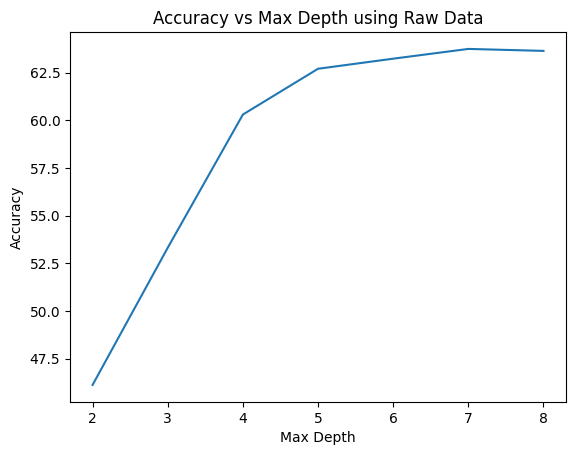

In [32]:
plt.plot([char for char in range(2,9)],np.array(accuracy_raw)*100)
plt.xlabel("Max Depth")  
plt.ylabel("Accuracy")
plt.title("Accuracy vs Max Depth using Raw Data")
plt.show()

In [11]:
accuracy_raw = []
for i in range(2,9):
    dt = DecisionTreeClassifier(criterion="gini", random_state=42,max_depth=i)
    dt.fit(Xtrain_tsfel,Ytrain_tsfel)
    predictions = dt.predict(Xtest_tsfel)
    accuracy_raw.append(accuracy_score(predictions, Ytest_tsfel))

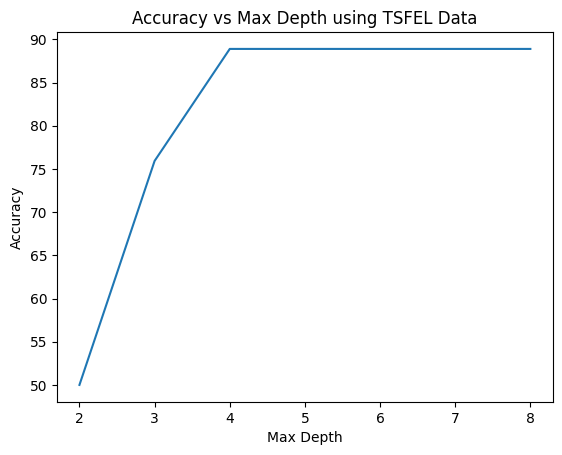

In [12]:
plt.plot([char for char in range(2,9)],np.array(accuracy_raw)*100)
plt.xlabel("Max Depth")  
plt.ylabel("Accuracy")
plt.title("Accuracy vs Max Depth using TSFEL Data")
plt.show()

In [33]:
accuracy_raw2 = []
for i in range(2,9):
    dt = DecisionTreeClassifier(criterion="gini", random_state=42,max_depth=i)
    dt.fit(featured_df,label_df)
    predictions = dt.predict(featured_df_test)
    accuracy_raw2.append(accuracy_score(predictions, labels_test))

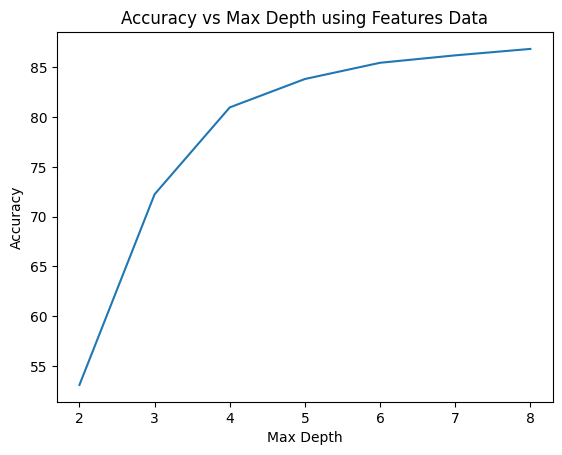

In [35]:
plt.plot([char for char in range(2,9)],np.array(accuracy_raw2)*100)
plt.xlabel("Max Depth")  
plt.ylabel("Accuracy")
plt.title("Accuracy vs Max Depth using Features Data")
plt.show()

From the above observations we can infer that the decision tree doesnt perform well when the depth of the tree is less than 3 and has a drastic shoot in accuracy after a depth of 3. We also observe that the model performs better with more features as compared to the raw accelerometer data where there are only 3 features.